In [1]:
#import necessary packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.feature_selection import RFE, RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV,StratifiedKFold,RepeatedStratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix, roc_auc_score ,roc_curve,auc
import warnings
warnings.filterwarnings("ignore")
sns.set(style = 'white')
%matplotlib inline

In [2]:
cf = pd.read_csv('https://raw.githubusercontent.com/uccaoeo/Kaggle-Learning/main/Churn.csv') #import dataset from Github

In [3]:
df =cf.copy() # copy the dataframe...so you can retrace steps just incase of mistakes and programming complexities

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#convert the Total Charges to float
#df['TotalCharges'] = df['TotalCharges'].astype(float, errors = 'raise')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
# We have 11 missing values in TotalCharges
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df[df['TotalCharges'].isna()]
#I actually observed that those without totalcharges have tenure = 0..meaning their subscription is still less than a month..

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [9]:
df.loc[df['TotalCharges'].isna(), 'TotalCharges'] = df.MonthlyCharges
# what i did here was to replicate the monthly charges to totalcharges for customers with less than one month. It seems logical that that is there is current total charges

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
#Let's drop the customer Id column and the target column into y
df1 = df.iloc[:, 1:] # this will drop the customer column
X = df1.iloc[:, :-1] # this select all columns except the last column which is churn
y = df1.iloc[:,-1:] # This select only the last column which is Churn : our target variable

In [12]:
cat_df = X.select_dtypes(include=['object']) #split the data into categorical and numerical variables for transformation and data cleansing
cat_df

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check
7039,Female,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic)
7040,Female,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check
7041,Male,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check


In [13]:
num_df = X.select_dtypes(include=['number']) #numerical variables
num_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [14]:
print(cat_df.isna().values.sum()) #no missing values in categorcial variables

0


In [15]:
cat_df1 = pd.get_dummies(cat_df) #let's use getdummies to conert them to numbers (this is same as onehotencoding)
cat_df1.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,1,1,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,1,1,0,1,0,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [16]:
y.dtypes   # the target variable is in object...I change it to 1's and 0's then convert to number dtype

Churn    object
dtype: object

In [17]:
y.loc[y['Churn'] == 'Yes', 'Churn'] = 1
y.loc[y['Churn'] == 'No', 'Churn'] = 0
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [18]:
y = y.astype(int)  # cast target y as integer

In [19]:
y.dtypes

Churn    int32
dtype: object

In [20]:
X2 = pd.concat([cat_df1, num_df], axis=1)  #combine both variables into a whole dataframe
X = X2
X

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,34,56.95,1889.50
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,2,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,24,84.80,1990.50
7039,1,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,72,103.20,7362.90
7040,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,11,29.60,346.45
7041,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,1,4,74.40,306.60


In [21]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


### Machine Learning Process Begins here


In [22]:
y.value_counts()  # we can see that we have more No's than Yes...

Churn
0        5174
1        1869
dtype: int64

### there are several ways of dealing with imbalanced dataset like this one...
1. Oversampling using SMOTE
2. we can use stratified k-fold so that the same ratio of 0 to 1 in the training dataset is same in the validation set.

I will be using Stratified k-fold.

<function matplotlib.pyplot.show(close=None, block=None)>

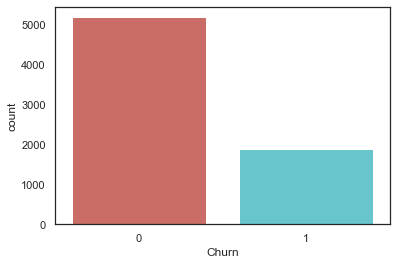

In [23]:
sns.countplot(x='Churn', data=y, palette='hls')
plt.show

### Evaluate which of the Classifiers will give the best accuracy

#### I use the below function to choose the best classifier for this dataset, I am not going to rerun it because it takes a lot of time to finish.  (the greedy method of model selection :)  )

In [ ]:
# explore the algorithm wrapped by RFE

# get the dataset
def get_dataset():
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # perceptron
    rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['per'] = Pipeline(steps=[('s',rfe),('m',model)])
    # cart
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['cart'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
    model = DecisionTreeClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 



In [ ]:
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### it is clear now that logistic regression outperforms other classifiers..let's now select the optimal features using RFECV. I am not running it again because it takes a lot of time to finish.

In [24]:
col = ['MonthlyCharges', 'TotalCharges','tenure']
for i in [col]:
    g=(X[i])
    print(g)

      MonthlyCharges  TotalCharges  tenure
0              29.85         29.85       1
1              56.95       1889.50      34
2              53.85        108.15       2
3              42.30       1840.75      45
4              70.70        151.65       2
...              ...           ...     ...
7038           84.80       1990.50      24
7039          103.20       7362.90      72
7040           29.60        346.45      11
7041           74.40        306.60       4
7042          105.65       6844.50      66

[7043 rows x 3 columns]


In [25]:
# Scale the numerical variables using MinMaxScaler

# create a scaler object
scaler = MinMaxScaler()
# fit and transform the three numeric data
df_norm = pd.DataFrame(scaler.fit_transform(g), columns=g.columns)

df_norm

,MonthlyCharges,TotalCharges,tenure
0,0.115423,0.001275,0.013889
1,0.385075,0.215867,0.472222
2,0.354229,0.010310,0.027778
3,0.239303,0.210241,0.625000
4,0.521891,0.015330,0.027778
...,...,...,...
7038,0.662189,0.227521,0.333333
7039,0.845274,0.847461,1.000000
7040,0.112935,0.037809,0.152778
7041,0.558706,0.033210,0.055556


In [26]:
X.drop(['MonthlyCharges', 'TotalCharges','tenure'], axis=1, inplace=True)

In [27]:
X = pd.concat([X, df_norm], axis=1)
X

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,MonthlyCharges,TotalCharges,tenure
0,1,0,0,1,1,0,1,0,0,1,...,0,1,0,0,1,0,0,0.115423,0.001275,0.013889
1,0,1,1,0,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0.385075,0.215867,0.472222
2,0,1,1,0,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0.354229,0.010310,0.027778
3,0,1,1,0,1,0,1,0,0,1,...,1,0,1,0,0,0,0,0.239303,0.210241,0.625000
4,1,0,1,0,1,0,0,1,1,0,...,0,1,0,0,1,0,0,0.521891,0.015330,0.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,0,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0.662189,0.227521,0.333333
7039,1,0,0,1,0,1,0,1,0,0,...,0,1,0,1,0,0,0,0.845274,0.847461,1.000000
7040,1,0,0,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0.112935,0.037809,0.152778
7041,0,1,0,1,1,0,0,1,0,0,...,0,1,0,0,0,1,1,0.558706,0.033210,0.055556


In [28]:
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
#X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [30]:
model = LogisticRegression()
rfecv = RFECV(estimator=LogisticRegression())
pipeline = Pipeline([('Feature Selection', rfecv), ('Model', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
np.mean(n_scores)

0.800677879933551

In [32]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('Feature Selection', RFECV(estimator=LogisticRegression())),
                ('Model', LogisticRegression())])

In [33]:
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 19


In [34]:
rfecv.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False,  True,  True, False,  True, False, False, False,
        True, False, False,  True, False,  True,  True, False, False,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False, False, False,  True, False,  True,  True,  True,  True])

In [35]:
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=['Rank']).sort_values(by='Rank',ascending=True)
rfecv_df.head()

,Rank
tenure,1
StreamingTV_Yes,1
StreamingMovies_Yes,1
TechSupport_No internet service,1
TechSupport_No,1


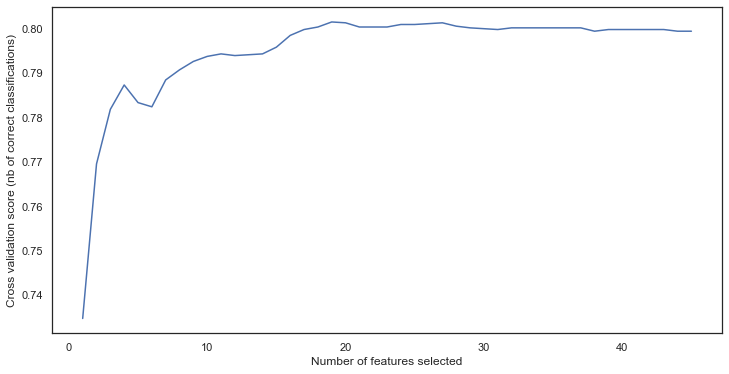

In [36]:
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [37]:
pd.DataFrame(rfecv.support_,index=X.columns,columns=['Rank'])

,Rank
gender_Female,False
gender_Male,False
Partner_No,False
Partner_Yes,False
Dependents_No,False
Dependents_Yes,False
PhoneService_No,False
PhoneService_Yes,False
MultipleLines_No,True
MultipleLines_No phone service,False


In [58]:
colu = ['tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen', \
        'PaymentMethod_Electronic check', 'PaperlessBilling_No', \
        'Contract_Two year','Contract_Month-to-month', 'StreamingMovies_Yes', \
        'StreamingMovies_No internet service', 'StreamingTV_Yes', 'TechSupport_No internet service',\
        'TechSupport_No', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service',\
        'OnlineSecurity_No', 'InternetService_Fiber optic','InternetService_DSL', 'MultipleLines_No']

### Next is to build our model on this parameters and do hyperparameter tuning....GridSearchCv RandomisedCV.

In [59]:
new_X = X[['tenure', 'TotalCharges', 'MonthlyCharges', 'SeniorCitizen', \
        'PaymentMethod_Electronic check', 'PaperlessBilling_No', \
        'Contract_Two year','Contract_Month-to-month', 'StreamingMovies_Yes', \
        'StreamingMovies_No internet service', 'StreamingTV_Yes', 'TechSupport_No internet service',\
        'TechSupport_No', 'DeviceProtection_No internet service', 'OnlineBackup_No internet service',\
        'OnlineSecurity_No', 'InternetService_Fiber optic','InternetService_DSL', 'MultipleLines_No']]
new_X

,tenure,TotalCharges,MonthlyCharges,SeniorCitizen,PaymentMethod_Electronic check,PaperlessBilling_No,Contract_Two year,Contract_Month-to-month,StreamingMovies_Yes,StreamingMovies_No internet service,StreamingTV_Yes,TechSupport_No internet service,TechSupport_No,DeviceProtection_No internet service,OnlineBackup_No internet service,OnlineSecurity_No,InternetService_Fiber optic,InternetService_DSL,MultipleLines_No
0,0.013889,0.001275,0.115423,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0
1,0.472222,0.215867,0.385075,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1
2,0.027778,0.010310,0.354229,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1
3,0.625000,0.210241,0.239303,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0.027778,0.015330,0.521891,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.333333,0.227521,0.662189,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0
7039,1.000000,0.847461,0.845274,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0
7040,0.152778,0.037809,0.112935,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0
7041,0.055556,0.033210,0.558706,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0


In [60]:
logreg = LogisticRegression(class_weight ='balanced')
param = {'C':[0.001,0.003,0.005, 0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20], 'penalty':['l1','l2']}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(new_X,y)
print('Best roc_auc: {:.4}, with best C: and penalty:{}'.format(clf.best_score_,clf.best_params_))

Best roc_auc: 0.8458, with best C: and penalty:{'C': 20, 'penalty': 'l2'}


In [66]:
logreg = LogisticRegression()
param = {'C':[0.001,0.003,0.005, 0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,4,5,10,20], 'penalty':['l1','l2']}
clf = GridSearchCV(logreg,param,scoring='roc_auc',refit=True,cv=10)
clf.fit(new_X,y)
print('Best roc_auc: {:.4}, with best C: and penalty:{}'.format(clf.best_score_,clf.best_params_))

Best roc_auc: 0.846, with best C: and penalty:{'C': 20, 'penalty': 'l2'}


In [61]:
new_X.dtypes


tenure                                  float64
TotalCharges                            float64
MonthlyCharges                          float64
SeniorCitizen                             int64
PaymentMethod_Electronic check            uint8
PaperlessBilling_No                       uint8
Contract_Two year                         uint8
Contract_Month-to-month                   uint8
StreamingMovies_Yes                       uint8
StreamingMovies_No internet service       uint8
StreamingTV_Yes                           uint8
TechSupport_No internet service           uint8
TechSupport_No                            uint8
DeviceProtection_No internet service      uint8
OnlineBackup_No internet service          uint8
OnlineSecurity_No                         uint8
InternetService_Fiber optic               uint8
InternetService_DSL                       uint8
MultipleLines_No                          uint8
dtype: object

In [51]:
x.dtypes

tenure                                  float64
TotalCharges                            float64
MonthlyCharges                          float64
SeniorCitizen                             int64
PaymentMethod_Electronic check            uint8
PaperlessBilling_No                       uint8
Contract_Two year                         uint8
Contract_Month-to-month                   uint8
StreamingMovies_Yes                       uint8
StreamingMovies_No internet service       uint8
StreamingTV_Yes                           uint8
TechSupport_No internet service           uint8
TechSupport_No                            uint8
DeviceProtection_No internet service      uint8
OnlineBackup_No internet service          uint8
OnlineSecurity_No                         uint8
InternetService_Fiber optic               uint8
InternetService_DSL                       uint8
MultipleLines_No                          uint8
dtype: object

### Make prediction using stratified kfold and the optimised parameters

In [67]:
# Create  classifier object.
lr = LogisticRegression(C=20, penalty='l2')
  
print(cross_val_score(lr, x, y, cv=10, scoring='accuracy').mean())

0.8044870245003224
